In [1]:
import os
import numpy as np
caffe_root = '/home/flathead/bitbucket/mycaffe/'
os.chdir('../../')
import sys
sys.path.insert(0, 'python')
import caffe

In [2]:
from pylab import *
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
from numpy.random import normal

In [ ]:
caffe.set_mode_gpu()
caffe.set_device(0)

In [4]:
net1 = caffe.Net('examples/mlp/test/mlp_train_test.prototxt',
                'examples/mlp/test/test_iter_10000.caffemodel', 
                 caffe.TEST)

In [5]:
feat1 = net1.params['ip1'][0].data
feat2 = net1.params['ip2'][0].data
feat3 = net1.params['ip3'][0].data
#feat4 = net1.params['ip4'][0].data

In [6]:
l1 = 200
l2 = 200
l3 = 10
#l4 = 10

'\nplt.subplot(4,1,4)\nplt.hist(feat4.flat, bins = 2000)\nplt.title("Last layer")\n'

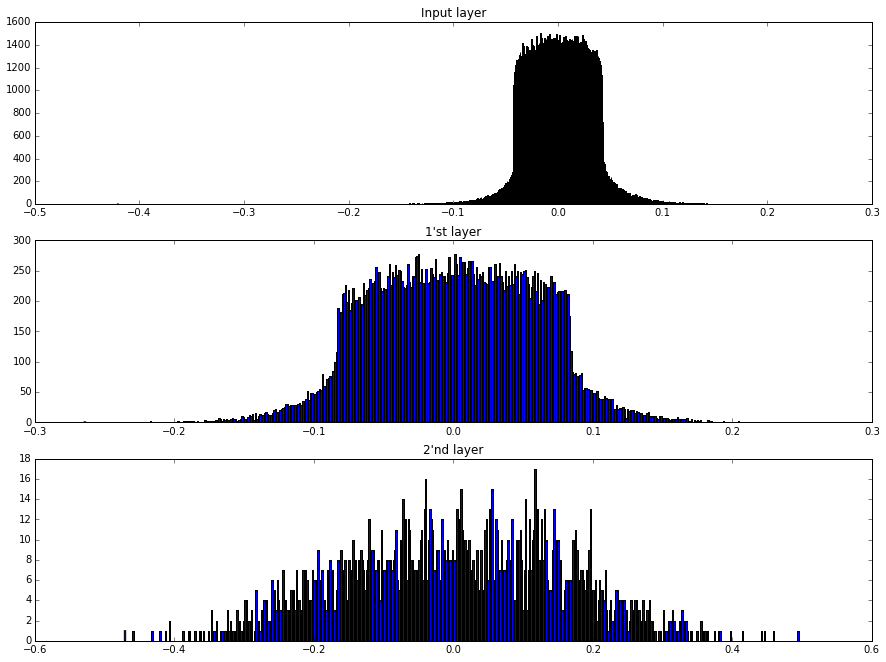

In [7]:
plt.figure(figsize=(15, 15))

plt.subplot(4,1,1)
plt.hist(feat1.flat, bins = 784)
plt.title("Input layer")

plt.subplot(4,1,2)
plt.hist(feat2.flat, bins = 500)
plt.title("1'st layer")

plt.subplot(4,1,3)
plt.hist(feat3.flat, bins = 500)
plt.title("2'nd layer")
'''
plt.subplot(4,1,4)
plt.hist(feat4.flat, bins = 2000)
plt.title("Last layer")
'''

In [8]:
#Layer 1
mean_feat1 = 0
std_feat1 = 0

mean_feat1 = feat1.mean()
std_feat1 = feat1.std()

#Neurons of Layer2
mean_feat2 = 0
std_feat2 = 0

mean_feat2 = feat2.mean()
std_feat2 = feat2.std()
#'''        
#Neurons of Layer 3
mean_feat3 = 0
std_feat3 = 0

mean_feat3 = feat3.mean()
std_feat3 = feat3.std()
'''    
#Neurons of Layer 4
mean_feat4 = 0
std_feat4 = 0

mean_feat4 = feat4.mean()
std_feat4 = feat4.std()
'''

'    \n#Neurons of Layer 4\nmean_feat4 = 0\nstd_feat4 = 0\n\nmean_feat4 = feat4.mean()\nstd_feat4 = feat4.std()\n'

In [ ]:
#Neurons of Layer 1
posm_feat1 = [0] * l1
negm_feat1 = [0] * l1
poss_feat1 = [0] * l1
negs_feat1 = [0] * l1

for j in range(l1):
    posm_feat1[j] = feat1[j][feat1[j] > 0].mean()
    negm_feat1[j] = feat1[j][feat1[j] < 0].mean()
    poss_feat1[j] = feat1[j][feat1[j] > 0].std()
    negs_feat1[j] = feat1[j][feat1[j] < 0].std()
    
#Neurons of Layer 2
posm_feat2 = [0] * l2
negm_feat2 = [0] * l2
poss_feat2 = [0] * l2
negs_feat2 = [0] * l2

for j in range(l2):
    posm_feat2[j] = feat2[j][feat2[j] > 0].mean()
    negm_feat2[j] = feat2[j][feat2[j] < 0].mean()
    poss_feat2[j] = feat2[j][feat2[j] > 0].std()
    negs_feat2[j] = feat2[j][feat2[j] < 0].std()

#'''
#Neurons of Layer 3
posm_feat3 = [0] * l3
negm_feat3 = [0] * l3
poss_feat3 = [0] * l3
negs_feat3 = [0] * l3

for j in range(l3):
    posm_feat3[j] = feat3[j][feat3[j] > 0].mean()
    negm_feat3[j] = feat3[j][feat3[j] < 0].mean()
    poss_feat3[j] = feat3[j][feat3[j] > 0].std()
    negs_feat3[j] = feat3[j][feat3[j] < 0].std()
#'''
#Neurons of Layer 4
posm_feat4 = [0] * l4
negm_feat4 = [0] * l4
poss_feat4 = [0] * l4
negs_feat4 = [0] * l4

for j in range(l4):
    posm_feat4[j] = feat4[j][feat4[j] > 0].mean()
    negm_feat4[j] = feat4[j][feat4[j] < 0].mean()
    poss_feat4[j] = feat4[j][feat4[j] > 0].std()
    negs_feat4[j] = feat4[j][feat4[j] < 0].std()
#'''

In [9]:
# rate * std range zero pruning
rate = 0.6

for x in range(l1):
    for y in range(784):
        if ((feat1[x,y] >= -std_feat1 * rate) & (feat1[x,y] <= rate * std_feat1)):
            feat1[x,y] = 0
        
for x in range(l2):
    for y in range(l1):
        if ((feat2[x,y] >= -std_feat2 * rate) & (feat2[x,y] <= rate * std_feat2)):
            feat2[x,y] = 0
#'''   
for x in range(l3):
    for y in range(l2):
        if ((feat3[x,y] >= -std_feat3 * rate) & (feat3[x,y] <= std_feat3 * rate)):
            feat3[x,y] = 0
'''            
for x in range(l4):
    for y in range(l3):
        if ((feat4[x,y] >= -std_feat4 * rate) & (feat4[x,y] <= std_feat4 * rate)):
            feat4[x,y] = 0
'''

'            \nfor x in range(l4):\n    for y in range(l3):\n        if ((feat4[x,y] >= -std_feat4 * rate) & (feat4[x,y] <= std_feat4 * rate)):\n            feat4[x,y] = 0\n'

In [10]:
net1.save('examples/mlp/test/zeropr/pruned.caffemodel')

In [12]:
ratio = zeros(3)

for x in range(l1):
    ratio[0] += (feat1[x] ==  0).sum()

for x in range(l2):
    ratio[1] += (feat2[x] ==  0).sum()
    
for x in range(l3):
    ratio[2] += (feat3[x] ==  0).sum()
    
#for x in range(l4):
#    ratio[3] += (feat4[x] ==  0).sum()

print (ratio[0] / (784 * l1), ratio[1] / (l2 * l1), ratio[2] / (l3 * l2))#, ratio[3] / (l4 * l3))

(0.41424107142857142, 0.38850000000000001, 0.40400000000000003)


In [ ]:
#Neurons of Layer 1
posm_feat1 = [0] * l1
negm_feat1 = [0] * l1
poss_feat1 = [0] * l1
negs_feat1 = [0] * l1

posm_feat1 = feat1[feat1 > 0].mean()
negm_feat1 = feat1[feat1 < 0].mean()
poss_feat1 = feat1[feat1 > 0].std()
negs_feat1 = feat1[feat1 < 0].std()
    
#Neurons of Layer 2
posm_feat2 = [0] * l2
negm_feat2 = [0] * l2
poss_feat2 = [0] * l2
negs_feat2 = [0] * l2


posm_feat2 = feat2[feat2 > 0].mean()
negm_feat2 = feat2[feat2 < 0].mean()
poss_feat2 = feat2[feat2 > 0].std()
negs_feat2 = feat2[feat2 < 0].std()

#'''
#Neurons of Layer 3
posm_feat3 = [0] * l3
negm_feat3 = [0] * l3
poss_feat3 = [0] * l3
negs_feat3 = [0] * l3

posm_feat3 = feat3[feat3 > 0].mean()
negm_feat3 = feat3[feat3 < 0].mean()
poss_feat3 = feat3[feat3 > 0].std()
negs_feat3 = feat3[feat3 < 0].std()
#'''
#Neurons of Layer 4
posm_feat4 = [0] * l4
negm_feat4 = [0] * l4
poss_feat4 = [0] * l4
negs_feat4 = [0] * l4

posm_feat4 = feat4[feat4 > 0].mean()
negm_feat4 = feat4[feat4 < 0].mean()
poss_feat4 = feat4[feat4 > 0].std()
negs_feat4 = feat4[feat4 < 0].std()
#'''

In [ ]:
# Mean value Quantization

for x in range(l1):
    for y in range(784):
        if (feat1[x, y] > 0):
            feat1[x,y] = posm_feat1
        if (feat1[x, y] < 0):
            feat1[x,y] = negm_feat1
#'''         
for x in range(l2):
    for y in range(l1):
        if (feat2[x, y] > 0):
            feat2[x,y] = posm_feat2
        if (feat2[x, y] < 0):
            feat2[x,y] = negm_feat2

#'''
for x in range(l3):
    for y in range(l2):
        if (feat3[x, y] > 0):
            feat3[x,y] = posm_feat3
        if (feat3[x, y] < 0):
            feat3[x,y] = negm_feat3
#'''            
for x in range(l4):
    for y in range(l3):
        if (feat4[x, y] > 0):
            feat4[x,y] = posm_feat4
        if (feat4[x, y] < 0):
            feat4[x,y] = negm_feat4
#'''

In [ ]:
net1.save('examples/mlp/zeropr/quantization.caffemodel')

In [ ]:
# same abolute values of posm and negm
#'''
for x in range(l1):
    for y in range(784):
        if (feat1[x, y] > 0):
            feat1[x,y] = (posm_feat1[x] - negm_feat1[x]) / 2
        if (feat1[x, y] < 0):
            feat1[x,y] = (negm_feat1[x] - posm_feat1[x]) / 2
#'''            
for x in range(l2):
    for y in range(l1):
        if (feat2[x, y] > 0):
            feat2[x,y] = (posm_feat2[x] - negm_feat2[x]) / 2
        if (feat2[x, y] < 0):
            feat2[x,y] = (negm_feat2[x] - posm_feat2[x]) / 2
#'''           
for x in range(l3):
    for y in range(l2):
        if (feat3[x, y] > 0):
            feat3[x,y] = (posm_feat3[x] - negm_feat3[x]) / 2
        if (feat3[x, y] < 0):
            feat3[x,y] = (negm_feat3[x] - posm_feat3[x]) / 2
#'''            
for x in range(l4):
    for y in range(l3):
        if (feat4[x, y] > 0):
            feat4[x,y] = (posm_feat4[x] - negm_feat4[x]) / 2
        if (feat4[x, y] < 0):
            feat4[x,y] = (negm_feat4[x] - posm_feat4[x]) / 2
#'''

In [ ]:
net1.save('examples/mlp/zeropr/sameabs.caffemodel')